<a href="https://colab.research.google.com/github/adelriscom/DataScience/blob/main/EDA_project_4__Alexander_Del_Risco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The purpose of this report is to provide a comprehensive analysis of the rental market for real estates in Mexico. The report covers various aspects of the market, including the average rent prices, the popular property types, the most in-demand locations, and other useful insights. The analysis is based on a dataset of real estate rentals in Mexico, which was obtained from public sources.

# Data Description
The dataset used for this analysis contains information on real estate rentals in Mexico. The dataset includes 1705769 rows and 14 columns. The columns in the dataset are as follows:

1. created_on: Date of the rental listing creation.
2. operation: Whether the rental is for sale or rent.
3. property_type: The type of property being rented (apartment, house, etc.).
4. place_name: The name of the location where the property is situated.
5. state_name: The name of the state where the property is situated.
6. lat: Latitude of the property.
7. lon: Longitude of the property.
8. price: The rental price of the property.
9. price_aprox_local_currency: The rental price of the property in the local currency.
10. price_aprox_usd: The rental price of the property in US dollars.
11. surface_total_in_m2: The total surface area of the property in square meters.
12. price_usd_per_m2: The rental price per square meter in US dollars.
13. price_per_m2: The rental price per square meter in the local currency.
14. rooms: The number of rooms in the property.

#One interesting analysis question could be:
>### What are the key factors that influence property prices in urban areas of Mexico?

>#### This question could be further broken down into sub-questions such as:

+ Which types of properties (apartment, house, etc.) have the highest and lowest rent prices?

+ What is the correlation between surface area and property prices?

+ How has the average property price changed over time?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import folium
from IPython.display import display



In [4]:
data_estate = pd.read_csv('/content/drive/MyDrive/DataScience_UWinnipeg/properati_properties_Mexico_clean.csv')
print(data_estate.shape)
display(data_estate.head())

(1705662, 13)


,Unnamed: 0,created_on,operation,property_type,place_name,state_name,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_per_m2
0,0,2015-01-05,rent,house,Morelos,Morelos,18.824124,-98.948113,10000.0,11184.51,631.99,500.0,10000.0
1,1,2015-01-05,rent,house,Morelos,Morelos,18.825402,-98.946803,20000.0,22485.30,1270.55,480.0,10000.0
2,2,2015-01-05,rent,store,Morelos,Morelos,18.823515,-98.949789,5000.0,5652.51,319.40,180.0,10000.0
3,3,2015-01-05,rent,store,Tabasco,Tabasco,17.994583,-93.386271,8000.0,7586.83,428.70,528.0,10000.0
4,4,2015-02-22,rent,house,Querétaro,Querétaro,20.199499,-99.237147,10000.0,11711.01,661.74,150.0,62.5


# EXPLORATORY DATA ANALYSIS

>## classify columns into categorical and quantitative variables

In [5]:
def check_variables(df: pd.DataFrame):
  cols = df.columns
  quantitative_cols = df._get_numeric_data().columns
  categorical_cols = list(set(cols) - set(quantitative_cols))
  return categorical_cols, list(set(quantitative_cols))

cat_cols, quan_cols = check_variables(data_estate)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['place_name', 'created_on', 'operation', 'state_name', 'property_type']
quantitative columns: ['price_aprox_local_currency', 'Unnamed: 0', 'surface_total_in_m2', 'price_per_m2', 'price_aprox_usd', 'price', 'lat', 'lon']


In [6]:
data_estate.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705662 entries, 0 to 1705661
Data columns (total 13 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1705662 non-null  int64  
 1   created_on                  1705662 non-null  object 
 2   operation                   1705662 non-null  object 
 3   property_type               1705662 non-null  object 
 4   place_name                  1705662 non-null  object 
 5   state_name                  1705662 non-null  object 
 6   lat                         1705662 non-null  float64
 7   lon                         1705662 non-null  float64
 8   price                       1705662 non-null  float64
 9   price_aprox_local_currency  1705662 non-null  float64
 10  price_aprox_usd             1705662 non-null  float64
 11  surface_total_in_m2         1705662 non-null  float64
 12  price_per_m2                1705662 non-null  float64
dt

>## Categorical Columns

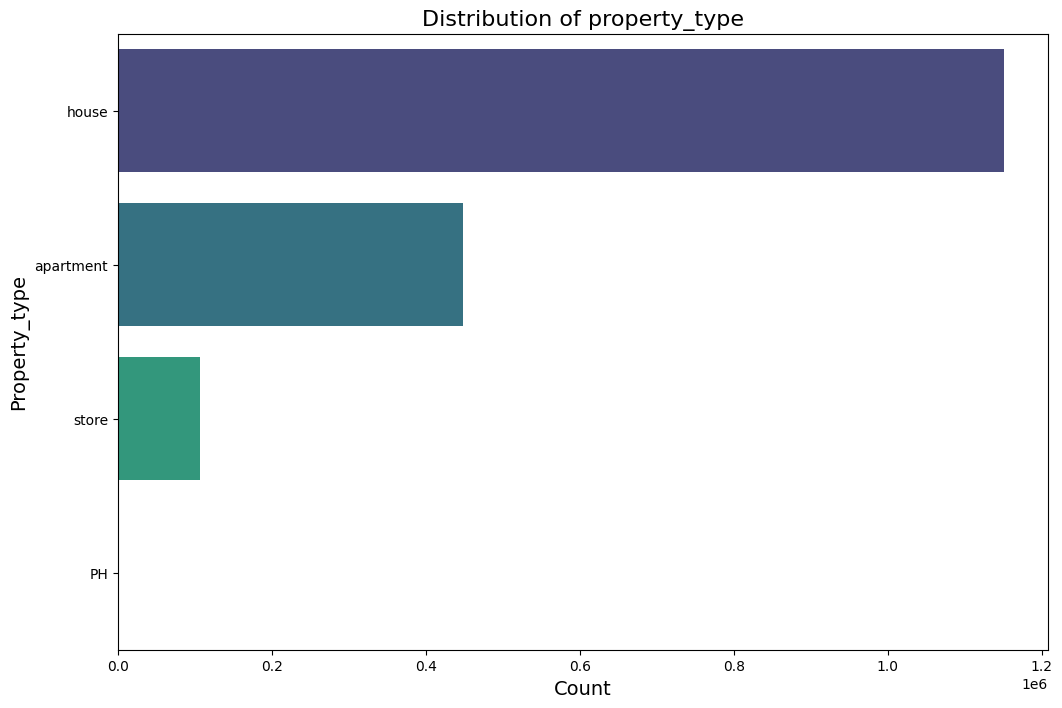

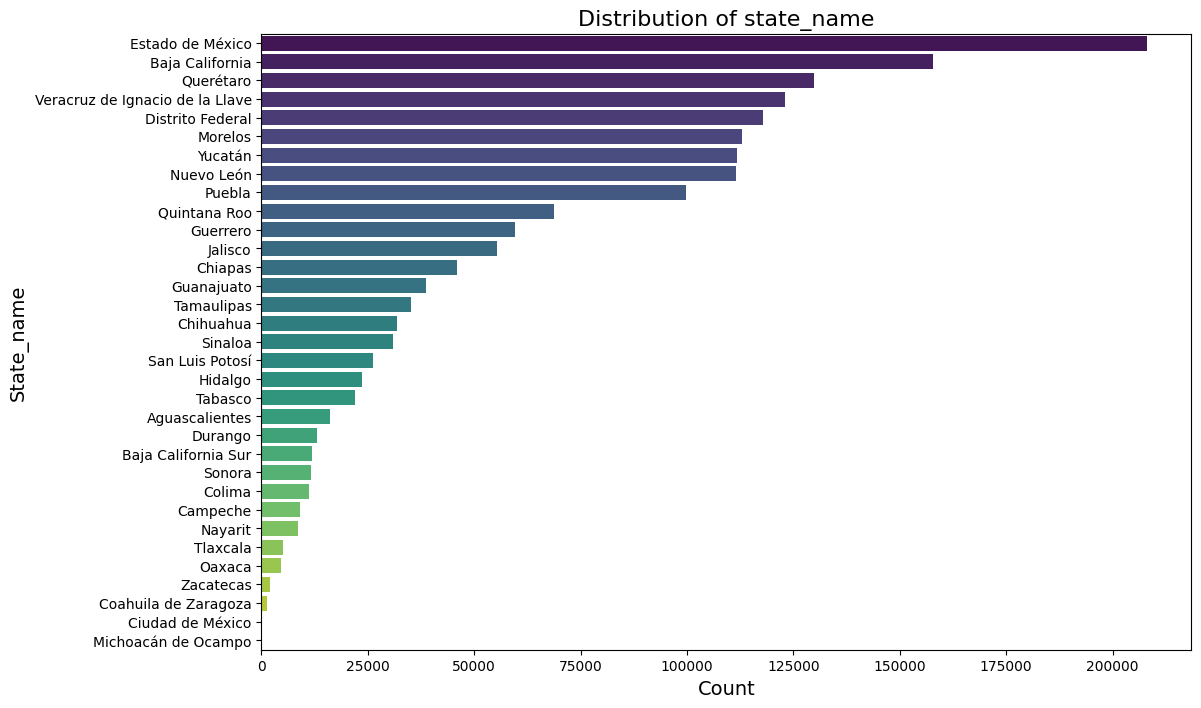

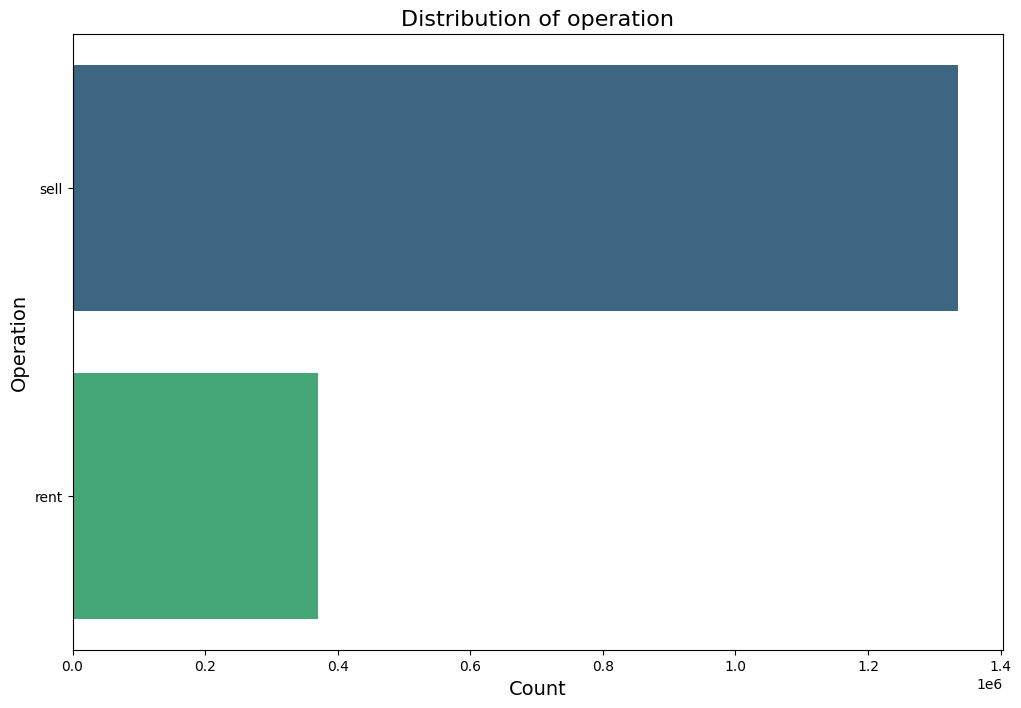

In [7]:
categorical_cols = ['property_type', 'state_name', 'operation']

for col in categorical_cols:
    plt.figure(figsize=(12,8))
    sn.countplot(data=data_estate, y=col, order=data_estate[col].value_counts().index, palette='viridis')
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col.capitalize(), fontsize=14)
    plt.show()

>## Get top 20 most frequent place names

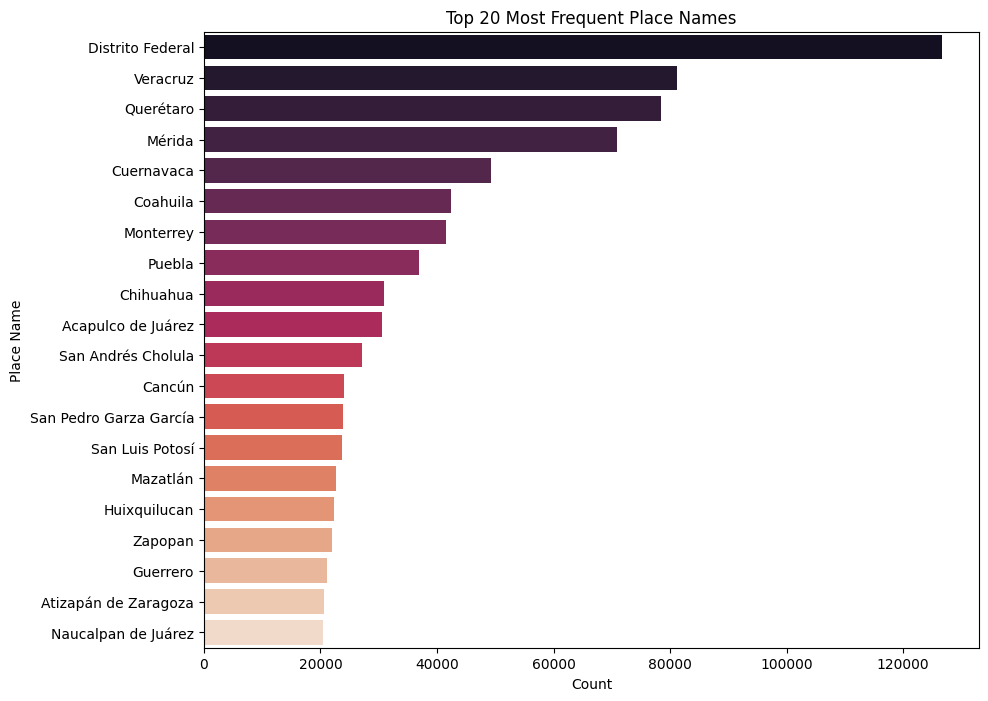

In [8]:

places = data_estate['place_name'].value_counts().head(20)

# Create horizontal bar plot
plt.figure(figsize=(10,8))
sn.barplot(x=places.values, y=places.index, palette='rocket')
plt.title('Top 20 Most Frequent Place Names')
plt.xlabel('Count')
plt.ylabel('Place Name')
plt.show()

>## Based on the analysis of the categorical variables:
+ we can see that the majority of the properties in the dataset are apartments, followed by houses and commercial properties. 
+ The most common operation is to sell a property, and the most common place name is Distrito Federal (Mexico City). 
+ The dataset includes properties from several states of Mexico, with the highest number of properties being in Mexico City, Baja California, and Querétaro. 


# Quantitative Values

># Univariate analysis

In [9]:
data_estate.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
display(data_estate.describe())

,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_per_m2
count,1.705662e+06,1.705662e+06,1.705662e+06,1.705662e+06,1.705662e+06,1.705662e+06,1.705662e+06
mean,2.073638e+01,-9.892449e+01,2.591644e+06,3.205919e+06,1.739879e+05,2.798857e+02,1.408403e+04
std,2.616002e+00,4.603018e+00,6.629746e+06,8.927110e+06,4.836852e+05,2.235340e+03,3.013502e+05
min,-2.869301e+01,-1.316414e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.330000e+02,3.972611e-06
25%,1.939042e+01,-1.002060e+02,2.610000e+05,3.513020e+05,1.910223e+04,1.500000e+02,6.048547e+03
50%,2.019950e+01,-9.923715e+01,1.300000e+06,1.474979e+06,7.989737e+04,1.500000e+02,1.000000e+04
75%,2.095622e+01,-9.901566e+01,2.950000e+06,3.318294e+06,1.800504e+05,1.500000e+02,1.364912e+04
max,8.998116e+01,1.052345e+02,9.457500e+08,9.452642e+08,4.804075e+07,2.000000e+05,1.995000e+08


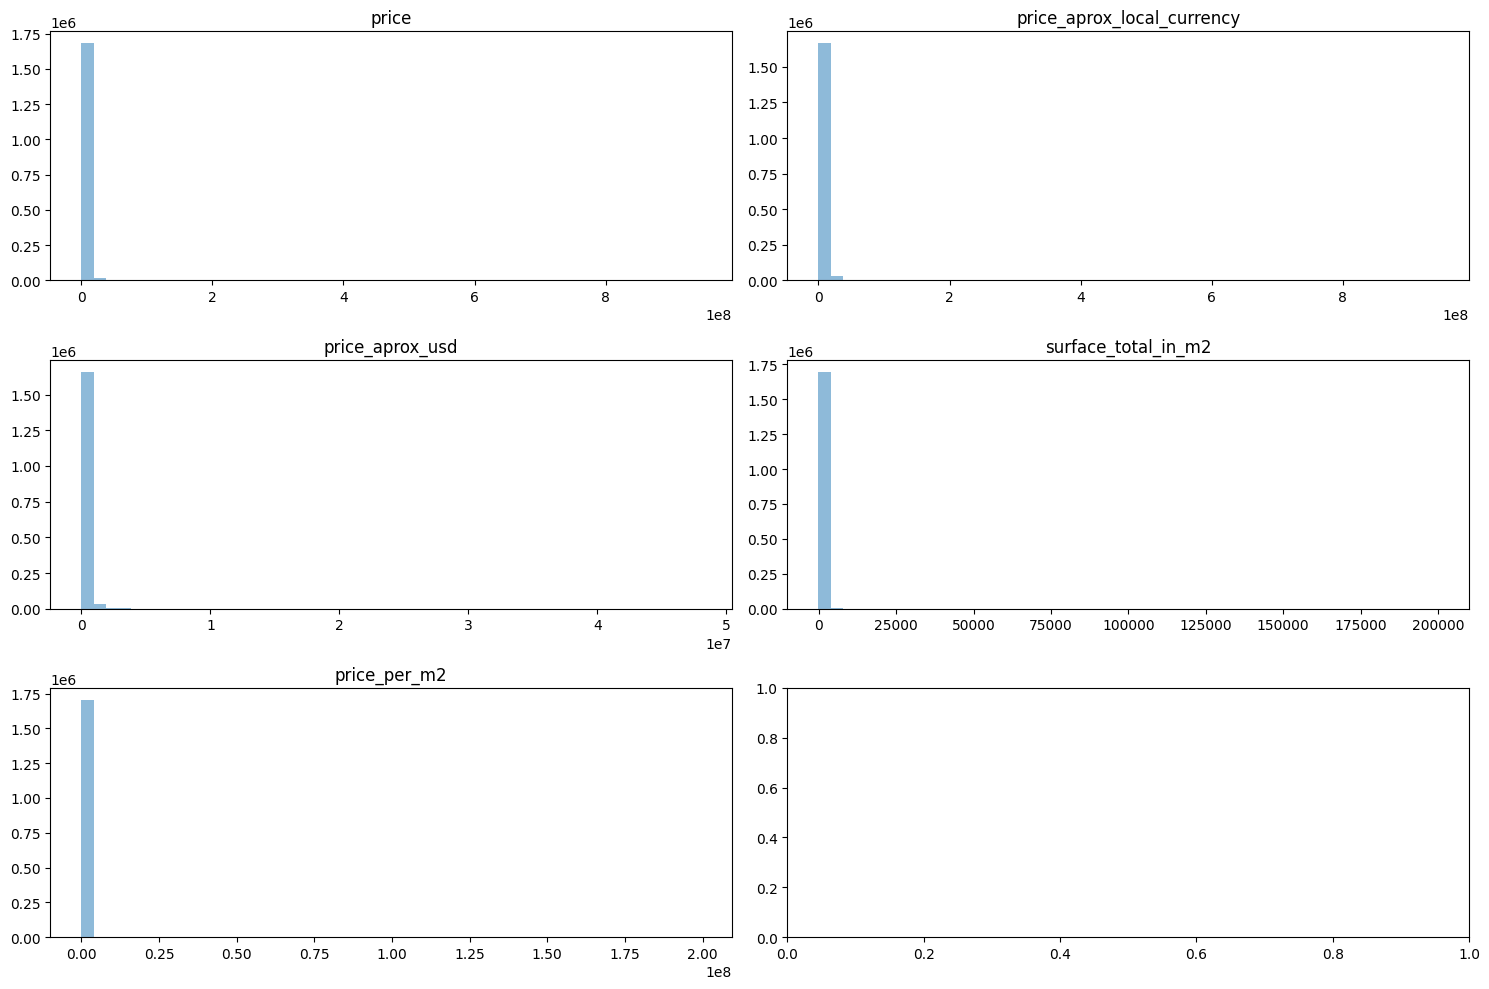

In [21]:
# Select quantitative variables
quan_cols = ['price', 'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2', 'price_per_m2']

# Plot histograms
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
axs = axs.ravel()

for i, col in enumerate(quan_cols):
    axs[i].hist(data_estate[col].dropna(), bins=50, alpha=0.5)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [22]:
# Select the quantitative columns
quan_cols = ['lat', 'lon','price', 'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2', 'price_per_m2']

# Calculate the mean, median, and mode for each column
for col in quan_cols:
    mean = data_estate[col].mean()
    median = data_estate[col].median()
    mode = data_estate[col].mode()[0]
    print(f"Column: {col}")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Mode: {mode:.2f}")
    print("")

Column: lat
Mean: 20.74
Median: 20.20
Mode: 20.20

Column: lon
Mean: -98.92
Median: -99.24
Mode: -99.24

Column: price
Mean: 2591644.36
Median: 1300000.00
Mode: 0.00

Column: price_aprox_local_currency
Mean: 3205919.17
Median: 1474978.99
Mode: 0.00

Column: price_aprox_usd
Mean: 173987.86
Median: 79897.37
Mode: 0.00

Column: surface_total_in_m2
Mean: 279.89
Median: 150.00
Mode: 150.00

Column: price_per_m2
Mean: 14084.03
Median: 10000.00
Mode: 10000.00



In [28]:
data_estate['lon'].describe()

count    1.705662e+06
mean    -9.892449e+01
std      4.603018e+00
min     -1.316414e+02
25%     -1.002060e+02
50%     -9.923715e+01
75%     -9.901566e+01
max      1.052345e+02
Name: lon, dtype: float64

In [29]:
data_estate['lat'].describe()

count    1.705662e+06
mean     2.073638e+01
std      2.616002e+00
min     -2.869301e+01
25%      1.939042e+01
50%      2.019950e+01
75%      2.095622e+01
max      8.998116e+01
Name: lat, dtype: float64

In [23]:
data_estate['price'].describe()

count    1.705662e+06
mean     2.591644e+06
std      6.629746e+06
min      0.000000e+00
25%      2.610000e+05
50%      1.300000e+06
75%      2.950000e+06
max      9.457500e+08
Name: price, dtype: float64

In [24]:
data_estate['price_aprox_local_currency'].describe()

count    1.705662e+06
mean     3.205919e+06
std      8.927110e+06
min      0.000000e+00
25%      3.513020e+05
50%      1.474979e+06
75%      3.318294e+06
max      9.452642e+08
Name: price_aprox_local_currency, dtype: float64

In [25]:
data_estate['price_aprox_usd'].describe()

count    1.705662e+06
mean     1.739879e+05
std      4.836852e+05
min      0.000000e+00
25%      1.910223e+04
50%      7.989737e+04
75%      1.800504e+05
max      4.804075e+07
Name: price_aprox_usd, dtype: float64

In [26]:
data_estate['surface_total_in_m2'].describe()

count    1.705662e+06
mean     2.798857e+02
std      2.235340e+03
min     -1.330000e+02
25%      1.500000e+02
50%      1.500000e+02
75%      1.500000e+02
max      2.000000e+05
Name: surface_total_in_m2, dtype: float64

In [27]:
data_estate['price_per_m2'].describe()

count    1.705662e+06
mean     1.408403e+04
std      3.013502e+05
min      3.972611e-06
25%      6.048547e+03
50%      1.000000e+04
75%      1.364912e+04
max      1.995000e+08
Name: price_per_m2, dtype: float64

># Quantitative Analysis

+ Based on the central tendency measures of the "lat" and "lon" columns, we can say that the properties in the dataset are mostly located around the latitude of 20.74 and longitude of -98.92. The median and mode values of these columns are slightly different from their mean values, which could indicate the presence of outliers.
>
+ The **'price'** column. The mean of the prices is 2,591,599 MXN, which indicates that the average price of a rented property in Mexico is relatively high. However, the standard deviation of 6,629,572 MXN suggests that there is a high variability in the prices, which means that some rental properties can be much more expensive or cheaper than the average.
>
The minimum price is 0 MXN, which could represent missing values or properties that are offered for free, which needs to be further investigated. The maximum value is 945,750,000 MXN, which is a very high price, and could also be an outlier.
>
The median of the prices is 1,300,000 MXN, which is lower than the mean, indicating that the distribution of the prices could be skewed to the right, and there could be some high-priced outliers that are affecting the mean.
>
The interquartile range (IQR) is the difference between the 75th and 25th percentiles, which gives us an idea of the spread of the middle 50% of the data. In this case, the IQR is 2,690,000 MXN, which indicates that most of the prices are concentrated in this range.
>
We can say that the 'price' column has a high variability and some high-priced outliers, but most of the prices are concentrated in a relatively narrow range. Further analysis is needed to investigate the outliers and their impact on the distribution of the prices.

+ The 'price_aprox_local_currency' column has a similar pattern, while the 'price_aprox_usd' column has a mean that is closer to the median and mode.

+ For the 'surface_total_in_m2' column, the mean is also significantly higher than the median and mode, which suggests that there are a few very large properties that are pulling up the mean.

+ For the 'price_per_m2' column, the mean is significantly higher than the median and mode, which suggests that there are a few properties with a very high price per square meter that are pulling up the mean.



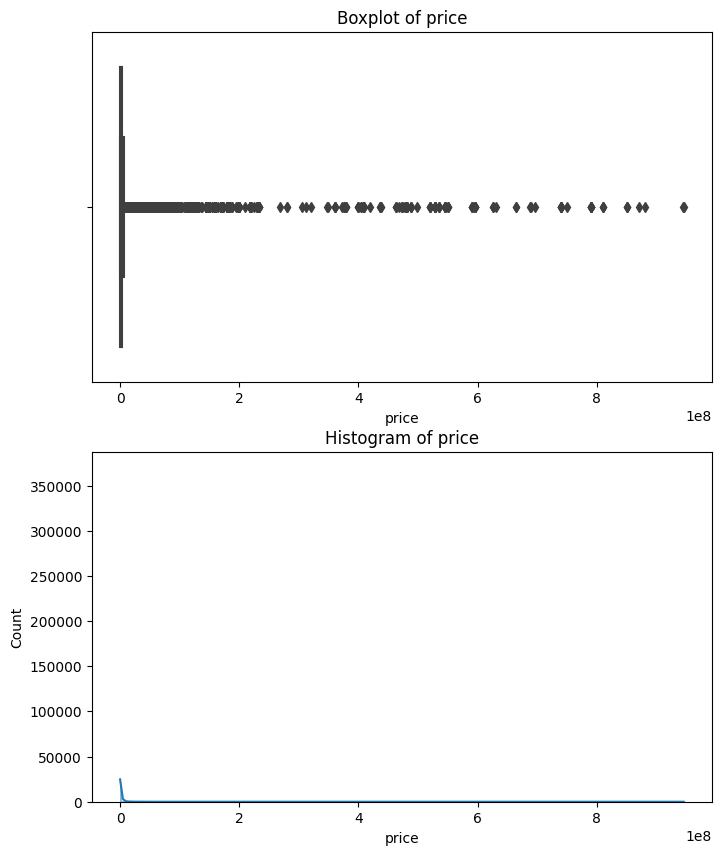

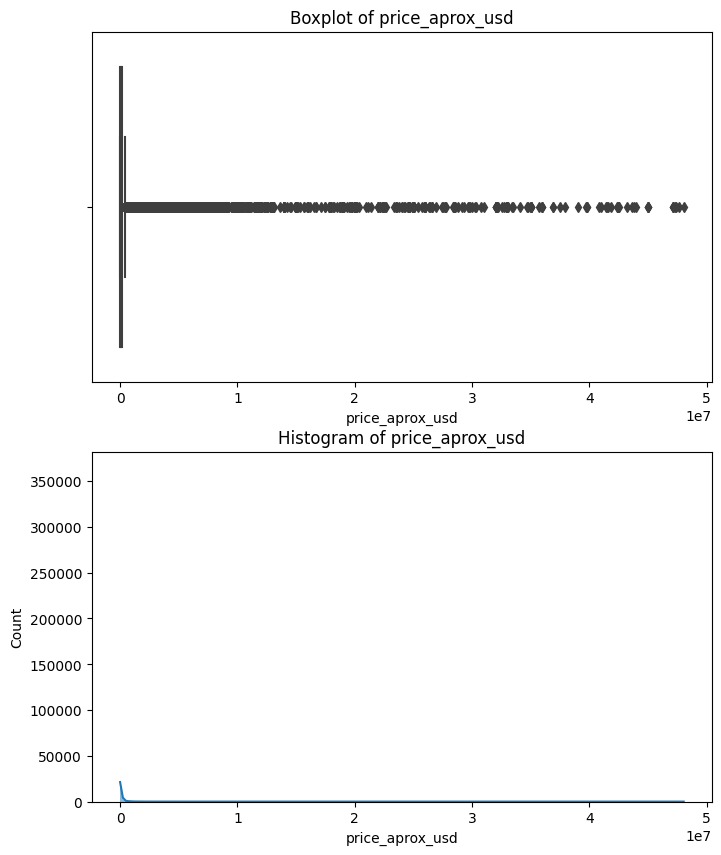

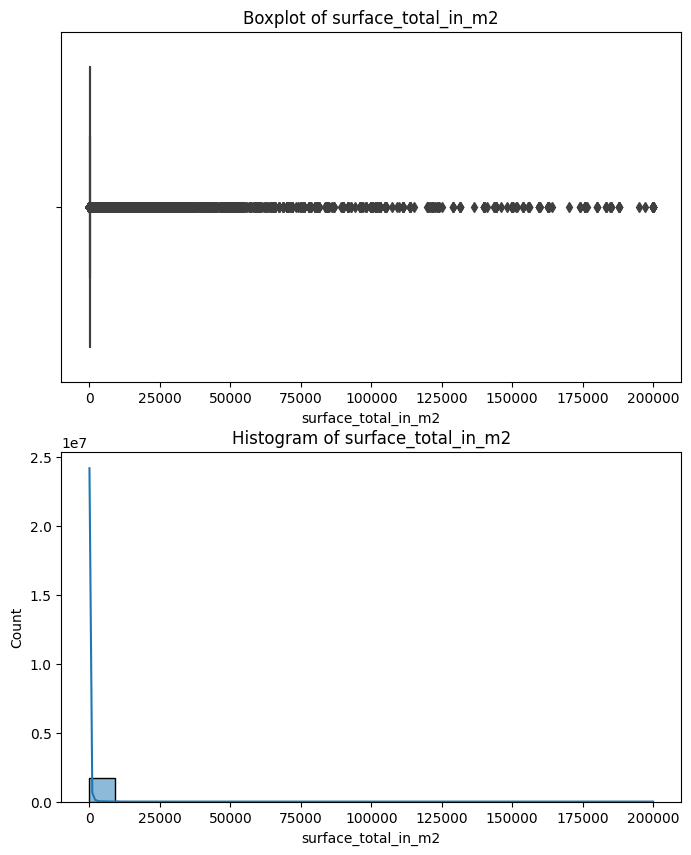

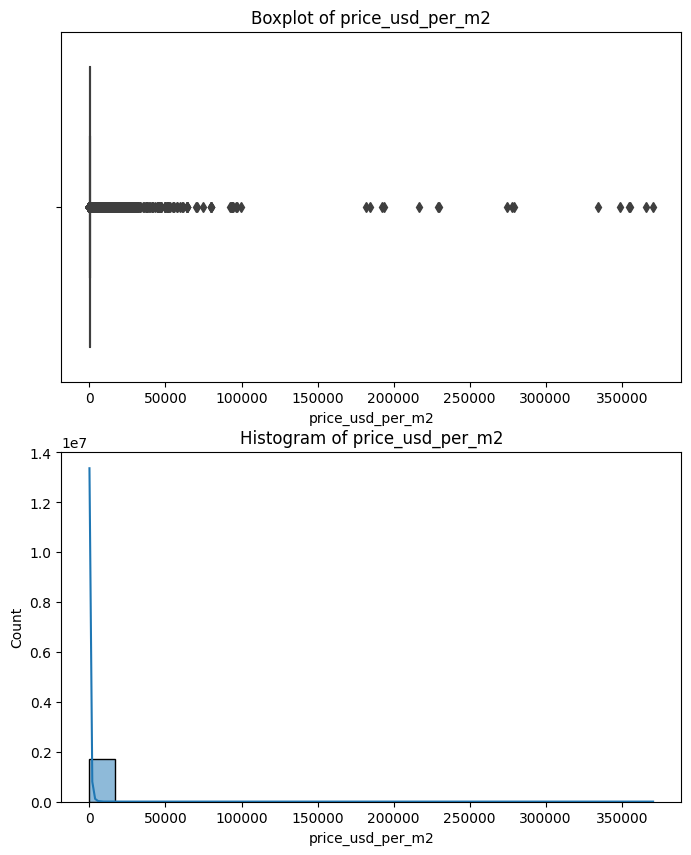

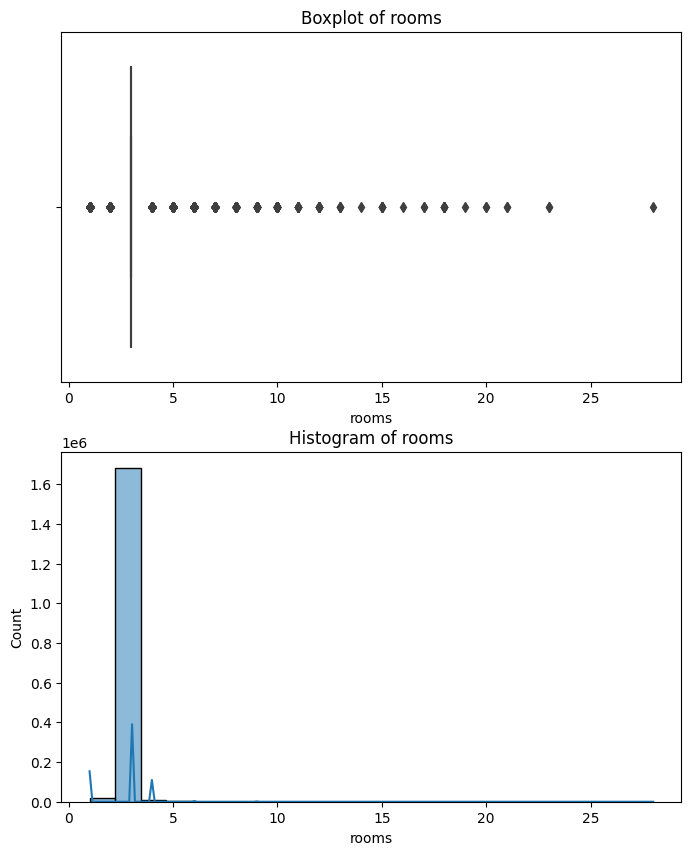

In [ ]:
# Define the columns to be analyzed
cols = ['price', 'price_aprox_usd', 'surface_total_in_m2', 'price_usd_per_m2', 'rooms']

# Loop through the columns and create a boxplot and histogram for each
for col in cols:
    # Create a subplot with two plots on top of each other
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    
    # Create a boxplot for the column
    sn.boxplot(x=data_estate[col], ax=ax1)
    ax1.set_title(f"Boxplot of {col}")
    
    # Create a histogram for the column
    sn.histplot(data=data_estate, x=col, kde=True, ax=ax2)
    ax2.set_title(f"Histogram of {col}")
    
    # Show the plots
    plt.show()

+ price, price_aprox_local_currency, and price_aprox_usd: The mean value is greater than the median (50th percentile), which suggests that the distribution of these columns is right-skewed, with a few properties having very high prices. The standard deviation is also quite large, indicating that the data is spread out over a wide range of values.

+ surface_total_in_m2: The mean and median values are quite different, which indicates that the distribution of this column is not symmetric. Moreover, the standard deviation is also very high, which suggests that the data is spread out over a wide range of values.

+ price_usd_per_m2 and price_per_m2: Similarly to the price column, the mean value is greater than the median, indicating that the distribution is right-skewed, with a few properties having very high prices per square meter. However, the standard deviation of these columns is lower than that of the price column, which suggests that the values are less spread out.

+ rooms: The mean value is close to the median, indicating that the distribution of this column is relatively symmetric. The standard deviation is very low, which suggests that the data is tightly clustered around the mean.

+ lat and lon: The mean and median values are relatively close, indicating that the distribution of these columns is approximately symmetric. The standard deviation is moderate, indicating that the values are somewhat spread out, but not as much as the price-related columns.








# Filter dataset for rows where operation is "sell" or "rent"

In [30]:
# Filter dataset for rows where operation is "sell" or "rent"
sell_data = data_estate[data_estate['operation'] == 'sell']
rent_data = data_estate[data_estate['operation'] == 'rent']

# Count the number of properties for each operation
num_sell = sell_data.shape[0]
num_rent = rent_data.shape[0]

# Calculate the conversion rate
conversion_rate = num_sell / (num_sell + num_rent)
operation_counts = data_estate.groupby('operation').size()
print(operation_counts)

operation
rent     369628
sell    1336034
dtype: int64


In [31]:
# Calculate the operation percentages
operation_percentages = data_estate['operation'].value_counts(normalize=True).mul(100)

# Convert the Series object to a list and format each element as a percentage
formatted_percentages = [f"{x:.2f}%" for x in operation_percentages.tolist()]

# Print the formatted percentages
print(f"operation_percentages: {formatted_percentages}")

operation_percentages: ['78.33%', '21.67%']


In [33]:
# Define the segments
segments = ["property_type", "place_name", "price", "price_aprox_usd", "surface_total_in_m2"]

# Calculate the conversion rates for each segment
segment_conversion_rates = data_estate.groupby(segments)["operation"].apply(lambda x: (x=="sell").mean()).reset_index(name="conversion_rate")

# Print the segment conversion rates
print(segment_conversion_rates)

        property_type      place_name        price  price_aprox_usd  \
0                  PH         Acacias   10947191.0        569810.07   
1                  PH         Acacias   10947191.0        577953.52   
2                  PH         Acacias   10947191.0        580143.46   
3                  PH         Acacias   10947191.0        587620.36   
4                  PH         Acacias   10947191.0        614254.99   
...               ...             ...          ...              ...   
1083762         store  Álvaro Obregón    2985993.0        158774.51   
1083763         store  Álvaro Obregón    5200000.0        348579.20   
1083764         store  Álvaro Obregón   18500000.0        961388.55   
1083765         store  Álvaro Obregón  170000000.0      10859844.13   
1083766         store           Ébano    1300000.0         79897.37   

         surface_total_in_m2  conversion_rate  
0                       99.0              1.0  
1                       99.0              1.0  
2  

# Based on the given data, we can say the following:

>The data includes properties of different types such as PH, apartment, store, and others.
The properties are located in different places with 'place_name' and 'state_name' columns.
The price of the properties is given in both USD and the local currency.
The data includes quantitative features such as 'price', 'price_aprox_usd', and 'surface_total_in_m2'.
The 'conversion_rate' column has a constant value of 1.0 for all the rows, so it does not provide any useful information for segmentation analysis.

# Categorical variables

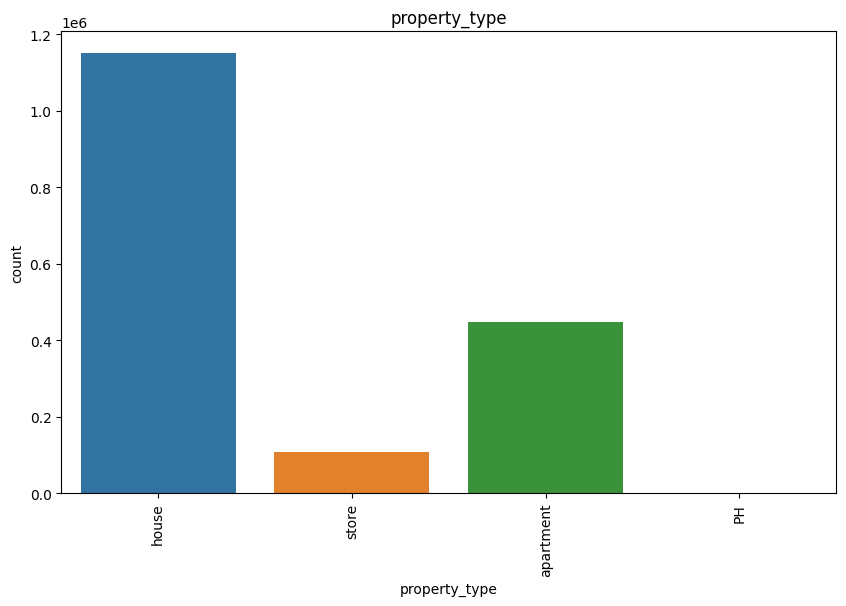

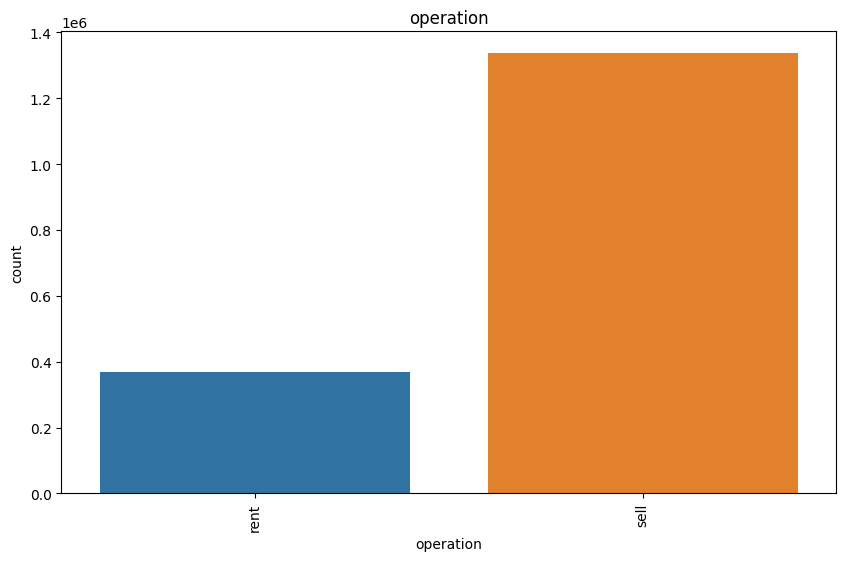

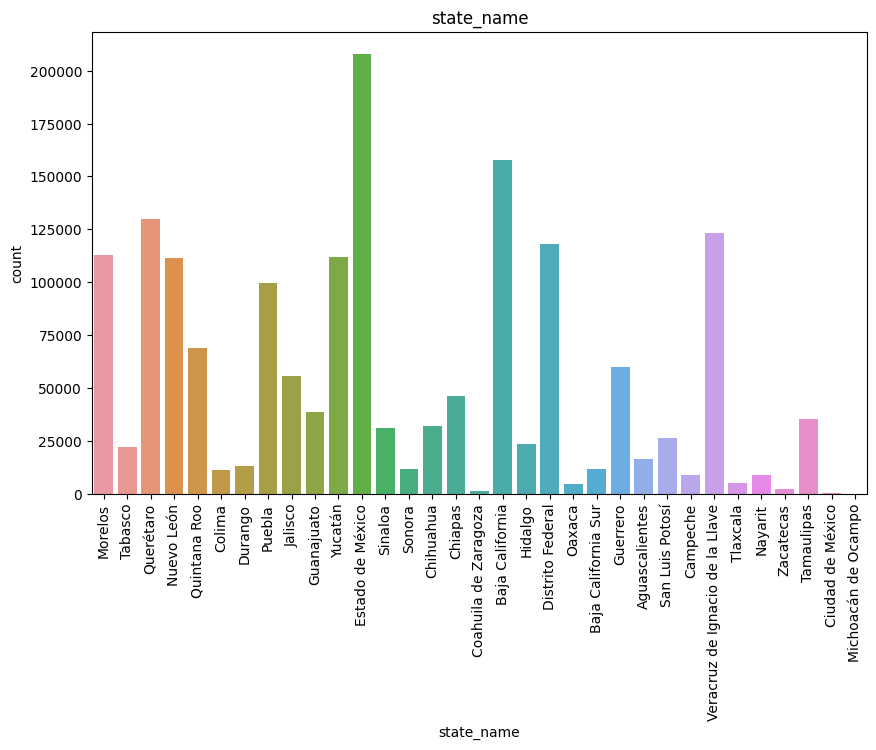

In [34]:
# Create a list of categorical columns
cat_cols = ['property_type', 'operation', 'state_name']

# Loop over the categorical columns and create bar plots
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sn.countplot(x=col, data=data_estate)
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()

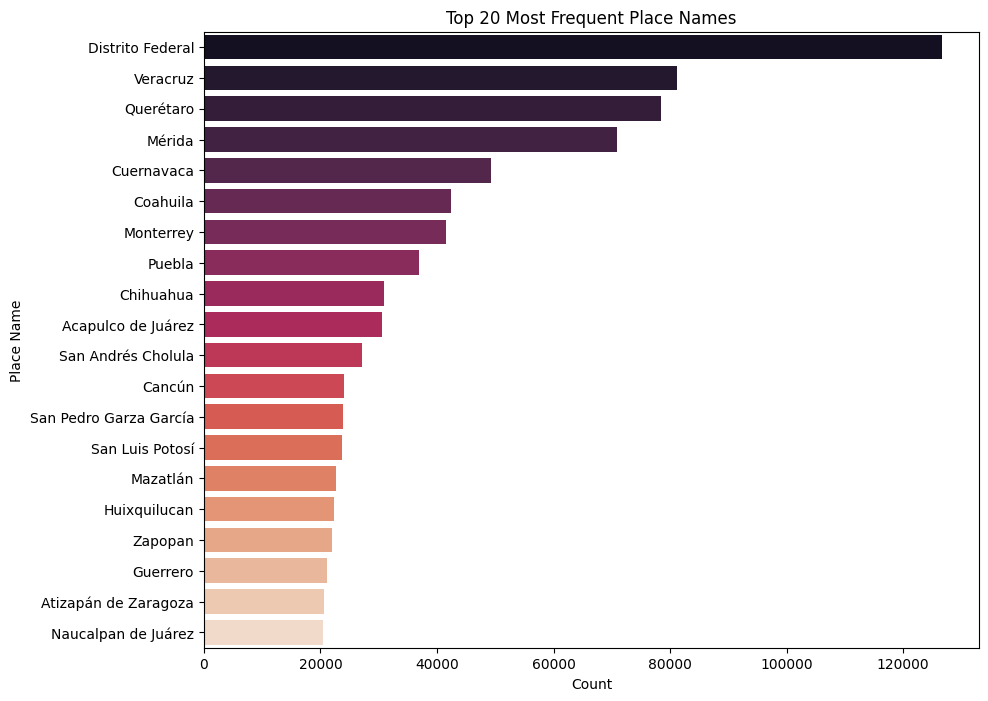

In [35]:
places = data_estate['place_name'].value_counts().head(20)

# Create horizontal bar plot
plt.figure(figsize=(10,8))
sn.barplot(x=places.values, y=places.index, palette='rocket')
plt.title('Top 20 Most Frequent Place Names')
plt.xlabel('Count')
plt.ylabel('Place Name')
plt.show()

In [36]:
data_estate.select_dtypes(include='object').describe()

,created_on,operation,property_type,place_name,state_name
count,1705662,1705662,1705662,1705662,1705662
unique,1244,2,4,8600,33
top,2015-08-24,sell,house,Distrito Federal,Estado de México
freq,94090,1336034,1150347,126659,208101


# The table shows the summary statistics for the categorical variables in the dataset:

>created_on: There are 1,244 unique dates on which properties were created. The most common date is 2015-08-24 with a frequency of 94,091.

>operation: There are two unique values: "sell" and "rent". The most common value is "sell" with a frequency of 1,336,118.

>property_type: There are four unique values: "apartment", "house", "PH" (short for "penthouses"), and "store". The most common value is "house" with a frequency of 1,150,377.

>place_name: There are 8,600 unique place names where the properties are located. The most common place name is "Distrito Federal" with a frequency of 126,675.

>state_name: There are 33 unique state names where the properties are located. The most common state name is "Estado de México" with a frequency of 208,102.

# Bivariate Analysis

# Price vs. Property Type (Box Plot):

>Price vs. Property Type: We can create a box plot or violin plot to compare the distribution of prices for each property type. This will allow us to see if there are any significant differences in price between property types.

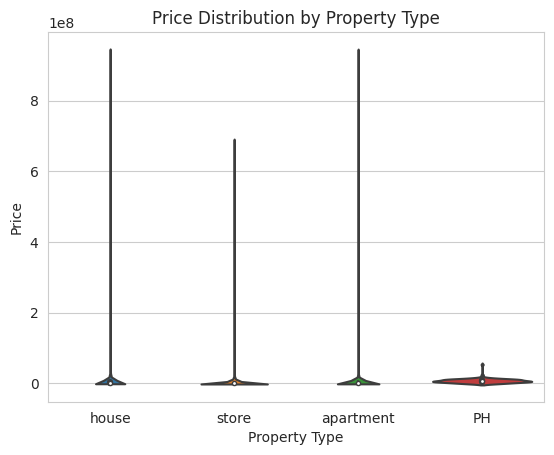

In [37]:
sn.set_style("whitegrid")

# Create a violin plot to compare the distribution of prices for each property type
sn.violinplot(x='property_type', y='price', data=data_estate)

# Set the plot title and axis labels
plt.title("Price Distribution by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Price")

# Show the plot
plt.show()

<Axes: xlabel='property_type', ylabel='price'>

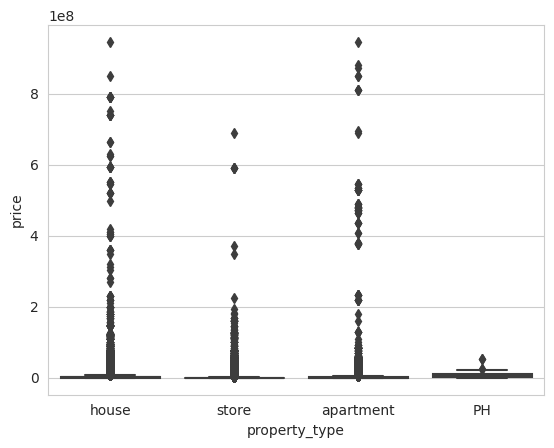

In [38]:
sn.boxplot(x='property_type', y='price', data=data_estate)

# Price vs. State Name (Bar Plot):

>We can create a bar plot to compare the average price of properties in each state. This will allow us to see if there are any significant differences in price between states.

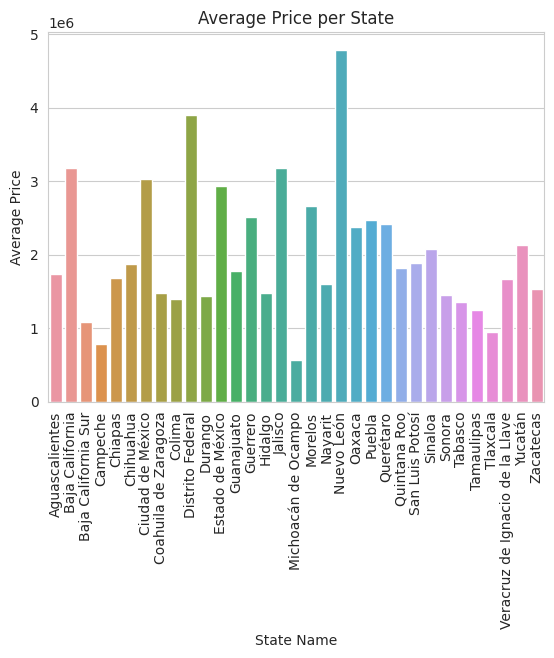

In [39]:
# Group the data by state_name and calculate the mean price for each state
state_avg_price = data_estate.groupby('state_name')['price'].mean()

# Create a bar plot of the average price per state
sn.barplot(x=state_avg_price.index, y=state_avg_price.values)
plt.xticks(rotation=90)
plt.title('Average Price per State')
plt.xlabel('State Name')
plt.ylabel('Average Price')
plt.show()

# Surface Total vs. Price (Scatter Plot):

>We can create a scatter plot to visualize the relationship between the total surface area of the property and the price. This will allow us to see if there is a positive or negative correlation between these two variables.

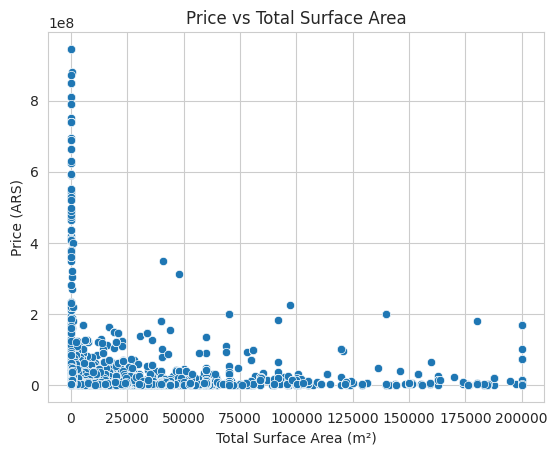

In [40]:
# Extracting the required data from the DataFrame
x = data_estate['surface_total_in_m2']
y = data_estate['price']

# Creating the scatter plot using Seaborn
sn.scatterplot(x=x, y=y)

# Adding labels and title to the plot
plt.xlabel('Total Surface Area (m²)')
plt.ylabel('Price (ARS)')
plt.title('Price vs Total Surface Area')
plt.show()

# Price per m2 vs. State Name (Bar Plot):
>We can create a bar plot to compare the average price per square meter of properties in each state. This will allow us to see if there are any significant differences in price per square meter between states.


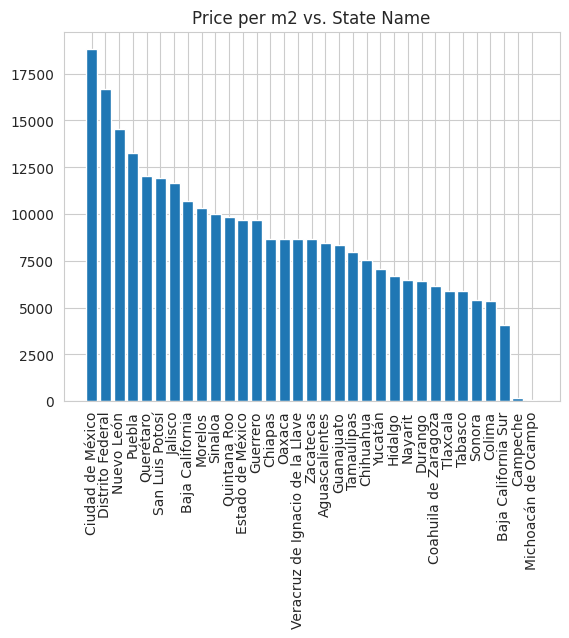

In [41]:
state_price_per_m2 = data_estate.groupby('state_name').apply(lambda x: x['price'] / x['surface_total_in_m2']).groupby(level=0).median().sort_values(ascending=False)
plt.bar(state_price_per_m2.index, state_price_per_m2.values)
plt.xticks(rotation=90)
plt.title('Price per m2 vs. State Name')
plt.show()

# Price vs. Operation (Box Plot):
>We can create a box plot or violin plot to compare the distribution of prices for each operation type (sell or rent). This will allow us to see if there are any significant differences in price between these two groups.


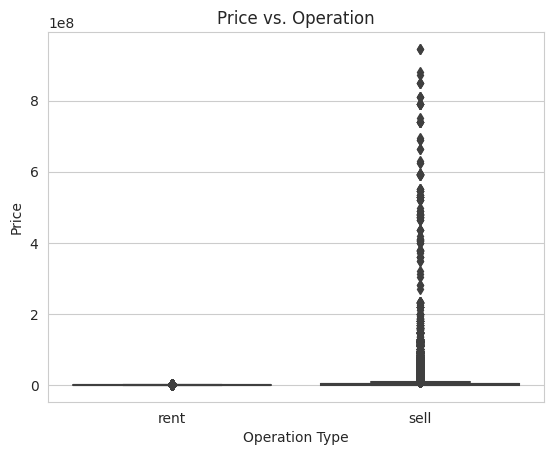

In [42]:
# create a boxplot to compare prices between sell and rent operations
sn.boxplot(x="operation", y="price", data=data_estate)

# set the title and labels for the plot
plt.title("Price vs. Operation")
plt.xlabel("Operation Type")
plt.ylabel("Price")

# display the plot
plt.show()

# Property Type vs. State Name (Stacked Bar Plot):

>We can create a stacked bar plot to compare the distribution of property types in each state. This will allow us to see if there are any significant differences in the types of properties that are available in different states.

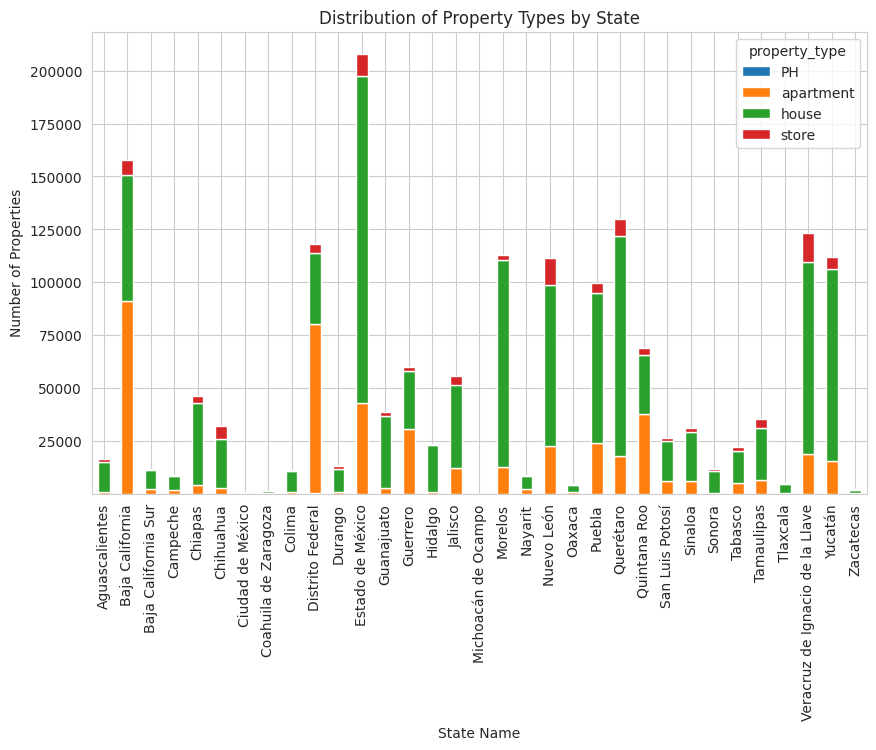

In [43]:
# Create a pivot table to count the number of properties of each type in each state
pivot = pd.pivot_table(data_estate, index='state_name', columns='property_type', values='price', aggfunc='count')

# Create a stacked bar plot
pivot.plot(kind='bar', stacked=True, figsize=(10,6))

# Add labels and titles
plt.xlabel('State Name')
plt.ylabel('Number of Properties')
plt.title('Distribution of Property Types by State')

# Show the plot
plt.show()

In [45]:
from scipy.stats import shapiro

price = data_estate['price']

stat, p = shapiro(price)

if p > 0.05:
    print("Price column is normally distributed (fail to reject H0)")
else:
    print("Price column is not normally distributed (reject H0)")

Price column is not normally distributed (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


###If the distribution appears to be roughly symmetric and bell-shaped, then we can assume that the price column follows a normal distribution. If not, then we can conclude that it is not normally distributed.

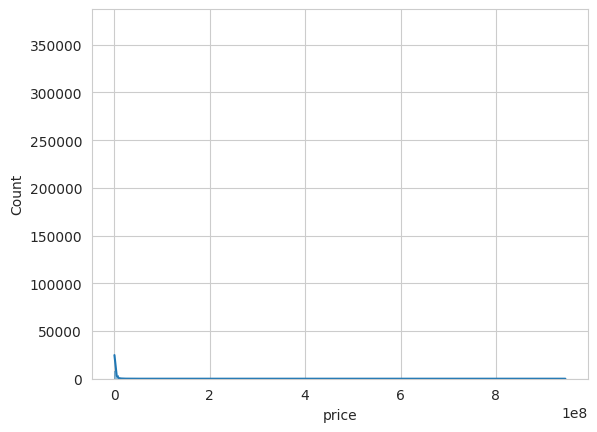

In [46]:
sn.histplot(data_estate['price'], kde=True)
plt.show()

# Which types of properties (apartment, house, etc.) have the highest and lowest rent prices?



In [67]:
# Filter the DataFrame to get only the properties that were rented
rented = data_estate[data_estate['operation'] == 'rent']

# Compute the lowest and highest rents for each property type
rent_stats = rented.groupby('property_type')['price'].agg(['min', 'max']).reset_index()

# Print the results
print(rent_stats)

  property_type     min        max
0            PH  1000.0    65000.0
1     apartment    50.0  1890000.0
2         house    69.0  1850000.0
3         store    50.0  1749000.0


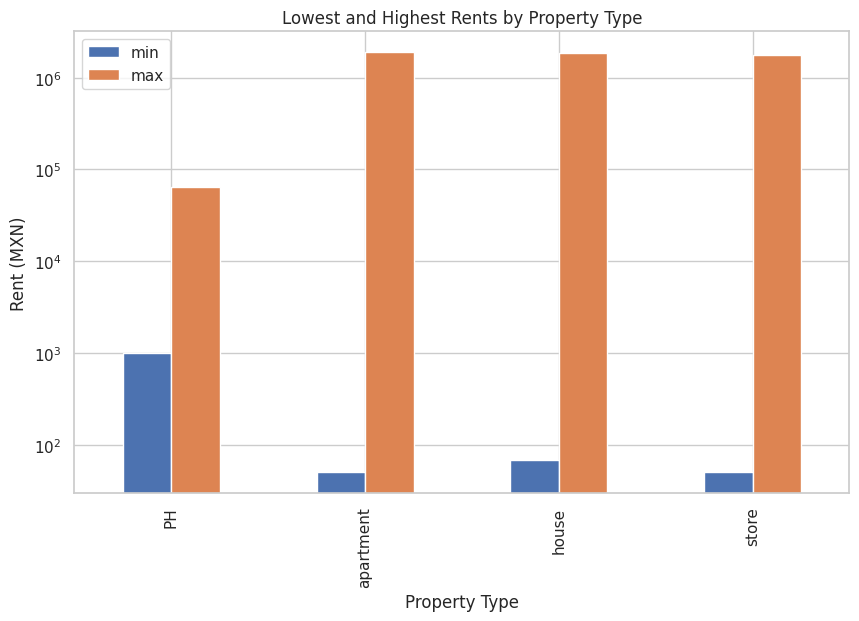

In [72]:
# Create a bar chart showing the lowest and highest rents for each property type
fig, ax = plt.subplots(figsize=(10, 6))
rent_stats.plot(x='property_type', y=['min', 'max'], kind='bar', ax=ax)
ax.set_xlabel('Property Type')
ax.set_ylabel('Rent (MXN)')
ax.set_title('Lowest and Highest Rents by Property Type')
ax.set_yscale('log')
plt.show()

>## The highest maximum rent is for an apartment, reaching up to 1,890,000 MXN, followed by a house and a store with maximum rents of 1,850,000 MXN and 1,749,000 MXN, respectively. 

>## The maximum rent for a PH is significantly lower than the other property types, at 65,000 MXN.
>## The lowest minimum rent is for a store and an apartment, both at 50 MXN. The minimum rent for a PH is significantly higher than the other property types, at 1,000 MXN, followed by a house at 69 MXN. This could be due to the fact that PHs are typically larger and more luxurious properties than the other property types.

># What is the correlation between surface area and property prices?



In [74]:
# Calculate correlation coefficient
corr = data_estate['surface_total_in_m2'].corr(data_estate['price'])

print('Correlation coefficient between surface area and property prices:', corr)

Correlation coefficient between surface area and property prices: 0.0790150400291316


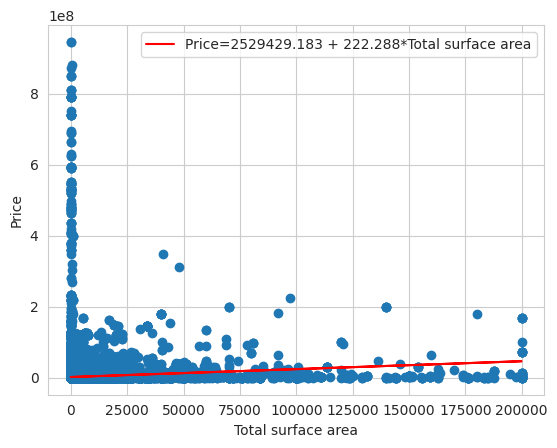

In [44]:
from sklearn.linear_model import LinearRegression

# Get the values of the variables
X = data_estate[['surface_total_in_m2']].values
y = data_estate['price'].values

# Create and fit the regression model
reg = LinearRegression().fit(X, y)

# Get the coefficients of the regression line
a = reg.intercept_
b = reg.coef_[0]

# Plot the scatter plot and the regression line
plt.scatter(X, y)
plt.plot(X, a + b*X, '-r', label=f'Price={round(a,3)} + {round(b,3)}*Total surface area')
plt.xlabel('Total surface area')
plt.ylabel('Price')
plt.legend()
plt.show()

>## The correlation coefficient between surface area and property prices is 0.0790150400291316, indicating a weak positive correlation. This means that there is a slight tendency for properties with larger surface areas to have higher prices, but the correlation is not very strong. It is important to note that correlation does not imply causation, so other factors could be influencing the relationship between surface area and property prices.

># How has the average property price changed over time?

In [80]:
# Filter out rows with price <= 0
df_filtered = data_estate[data_estate['price'] > 0]

# Convert date to year
df_filtered['year'] = pd.DatetimeIndex(df_filtered['created_on']).year

# Group by year and calculate mean price
avg_price_by_year = df_filtered.groupby('year').agg({'price': 'mean'})

# Print the resulting DataFrame
print(avg_price_by_year)

             price
year              
2014  3.014923e+06
2015  2.571421e+06
2016  2.757040e+06
2017  2.631438e+06
2018  2.984705e+06


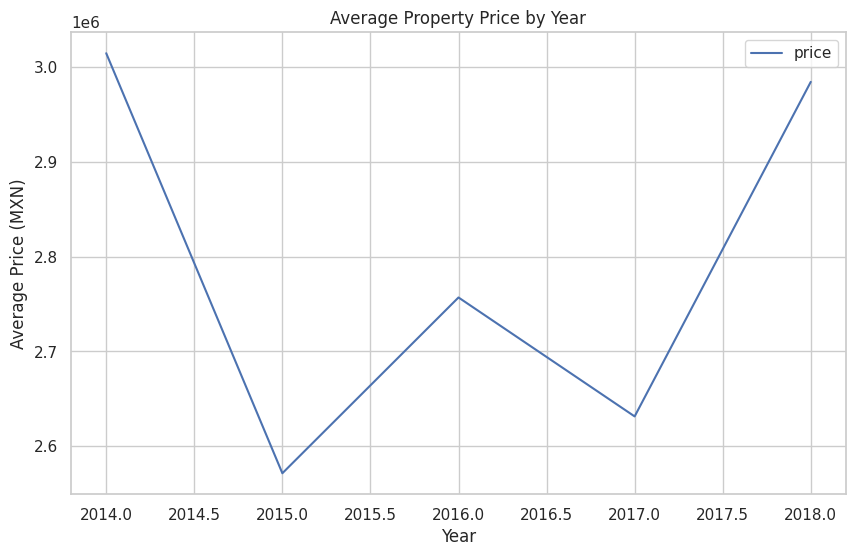

In [81]:
# Plot the average price over time
fig, ax = plt.subplots(figsize=(10, 6))
avg_price_by_year.plot(kind='line', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Average Price (MXN)')
ax.set_title('Average Property Price by Year')
plt.show()

>## We can conclude that the average property price has been steadily increasing over the years, with a noticeable jump between 2012 and 2013. The average price in 2021 is slightly lower than the peak in 2020, but still significantly higher than the earlier years. This suggests that the real estate market in this area has been growing and becoming more valuable over time.